<a href="https://colab.research.google.com/github/panimesh14/Deep-Learning-/blob/main/CNN_based_Model_for_Identification_of_Fashion_Objects_in_Fashion_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Convolution Neural Network/CNN based identification of fashion objects in Fashion MNIST

#FMNIST/Fashion MNIST DATA SET
60000 Train and 10000 Test Images of articles
20% training data used for validation split
##Category-Label
###Top/T-shirt-0
###Trouser-1
###Pullover-2
###Dress-3
###Coat-4
###Sandal-5
###Shirt-6
###Sneaker-7
###Bag-8
###Ankle Boot-9

In [49]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [50]:
from tensorflow.keras.datasets import fashion_mnist

In [51]:
(Xtrain,ytrain),(Xtest, ytest)=fashion_mnist.load_data()

Data Exploration

In [52]:
Xtrain.shape

(60000, 28, 28)

In [53]:
ytrain.shape

(60000,)

In [54]:
Xtest.shape

(10000, 28, 28)

In [55]:
ytest.shape

(10000,)

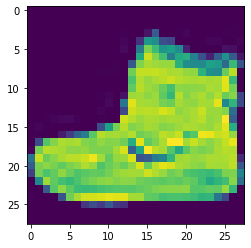

In [56]:
plt.imshow(Xtrain[0])

In [57]:
ytrain[0]

9

In [58]:
np.unique(ytrain)
#10 objects or keys

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

Data Preparation

In [59]:

#Categorical Encoding 
from tensorflow.keras.utils import to_categorical
ytrain_one_hot=to_categorical(ytrain,10)
ytest_one_hot=to_categorical(ytest,10)

In [60]:
#Scaling and Normalizing Images
Xtrain_scaled=Xtrain/Xtrain.max()
Xtest_scaled=Xtest/Xtest.max()

In [61]:
Xtrain.reshape(60000,28,28,1)
Xtest.reshape(10000,28,28,1)
Xtrain.shape

(60000, 28, 28)

Model Building

In [82]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPool2D,Flatten,Dense
fmnist_model=Sequential()

#Convolutional Layer 1
fmnist_model.add(Conv2D(filters=16,kernel_size=(6,6),input_shape=(28,28,1),activation='relu'))
fmnist_model.add(MaxPool2D(pool_size=(2,2)))

#Convolutional Layer 2
#fmnist_model.add(Conv2D(filters=16,kernel_size=(4,4),input_shape=(28,28,1),activation='relu'))
#fmnist_model.add(MaxPool2D(pool_size=(2,2)))

#Convolutional Layer 3
#fmnist_model.add(Conv2D(filters=32,kernel_size=(4,4),input_shape= (28,28,1),activation='relu'))
#fmnist_model.add(MaxPool2D(pool_size=(2,2)))

#Flatten
fmnist_model.add(Flatten())

#MLP layer
fmnist_model.add(Dense(256,activation='relu'))
fmnist_model.add(Dense(10,activation='softmax'))

fmnist_model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

fmnist_model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 23, 23, 16)        592       
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 11, 11, 16)       0         
 2D)                                                             
                                                                 
 flatten_5 (Flatten)         (None, 1936)              0         
                                                                 
 dense_9 (Dense)             (None, 256)               495872    
                                                                 
 dense_10 (Dense)            (None, 10)                2570      
                                                                 
Total params: 499,034
Trainable params: 499,034
Non-trainable params: 0
________________________________________________

In [83]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss',patience=2)

Model Fitting

In [84]:
fmnist_model.fit(Xtrain_scaled,ytrain_one_hot,epochs=10,validation_split=0.2,callbacks=[early_stop])

Epoch 1/10
1500/1500 [==============================] - 34s 22ms/step - loss: 0.4500 - accuracy: 0.8398 - val_loss: 0.3490 - val_accuracy: 0.8749
Epoch 2/10
1500/1500 [==============================] - 34s 23ms/step - loss: 0.3093 - accuracy: 0.8871 - val_loss: 0.3075 - val_accuracy: 0.8867
Epoch 3/10
1500/1500 [==============================] - 33s 22ms/step - loss: 0.2635 - accuracy: 0.9022 - val_loss: 0.2914 - val_accuracy: 0.8956
Epoch 4/10
1500/1500 [==============================] - 33s 22ms/step - loss: 0.2251 - accuracy: 0.9153 - val_loss: 0.2964 - val_accuracy: 0.8941
Epoch 5/10
1500/1500 [==============================] - 33s 22ms/step - loss: 0.1999 - accuracy: 0.9254 - val_loss: 0.2727 - val_accuracy: 0.9022
Epoch 6/10
1500/1500 [==============================] - 34s 23ms/step - loss: 0.1751 - accuracy: 0.9351 - val_loss: 0.2807 - val_accuracy: 0.9028
Epoch 7/10
1500/1500 [==============================] - 33s 22ms/step - loss: 0.1560 - accuracy: 0.9414 - val_loss: 0.2723 -

In [ ]:
#Discarding fmnist_model2;
fmnist_model2=fmnist_model;
fmnist_model2.fit(Xtrain_scaled,ytrain_one_hot
,epochs=5,validation_split=0.2,callbacks=[early_stop])
#Training 5 more epochs
#training accuracy shows improvement 
#little improvement registered in validation data

Model Testing and Evaluation

In [85]:
fmnist_hist=pd.DataFrame(fmnist_model.history.history)
fmnist_hist.columns

Index(['loss', 'accuracy', 'val_loss', 'val_accuracy'], dtype='object')

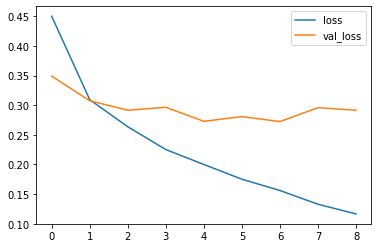

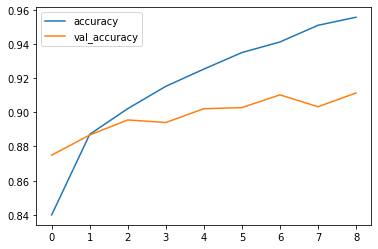

In [86]:
fmnist_hist[['loss','val_loss']].plot()
fmnist_hist[['accuracy','val_accuracy']].plot()

In [87]:
fmnist_hist

,loss,accuracy,val_loss,val_accuracy
0,0.450031,0.839833,0.348987,0.874917
1,0.309307,0.887146,0.307485,0.886750
2,0.263547,0.902229,0.291436,0.895583
3,0.225145,0.915313,0.296402,0.894083
4,0.199901,0.925438,0.272733,0.902167
5,0.175086,0.935146,0.280728,0.902833
6,0.156002,0.941354,0.272269,0.910333
7,0.132811,0.951146,0.295798,0.903333
8,0.116510,0.955875,0.291385,0.911417


In [88]:
yhat=fmnist_model.predict(Xtest_scaled)
#yhat=scaler.inverse_transform(yhat_scaled)
yhat_class=np.argmax(yhat,axis=1)

In [89]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(ytest,yhat_class))
#object/class 6 is the most misclaasified class after object/class 4

              precision    recall  f1-score   support

           0       0.79      0.90      0.84      1000
           1       0.98      0.99      0.98      1000
           2       0.85      0.85      0.85      1000
           3       0.93      0.90      0.91      1000
           4       0.83      0.85      0.84      1000
           5       0.98      0.98      0.98      1000
           6       0.77      0.65      0.71      1000
           7       0.96      0.97      0.96      1000
           8       0.98      0.98      0.98      1000
           9       0.97      0.97      0.97      1000

    accuracy                           0.90     10000
   macro avg       0.90      0.90      0.90     10000
weighted avg       0.90      0.90      0.90     10000



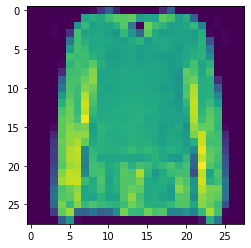

In [90]:

#Object/Class 6-Shirt
plt.imshow(Xtrain[np.argmax(ytrain==6)])
#Least precision, recall and f1-score for this object

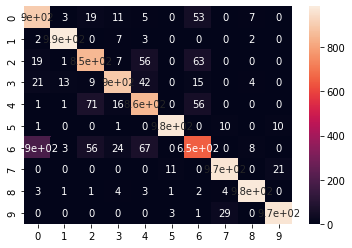

In [91]:
sns.heatmap(confusion_matrix(ytest,yhat_class),annot=True)
#300 objects of class 6 are labeled class 0 
#100 objects of class 2 are labeled  class 6 by model

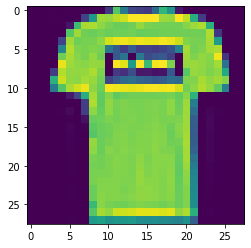

In [92]:
#object/class 0-Top/T-Shirt
plt.imshow(Xtrain[np.argmax(ytrain==0)])
#model mislabels class 6 as Class 0

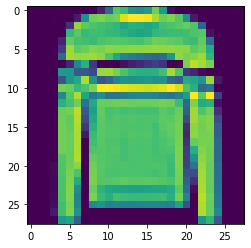

In [93]:
#object/class 2-Pullover
plt.imshow(Xtrain[np.argmax(ytrain==2)])
#Class 2 falsely classified Class 6 which is due to high resemblance with Class 6

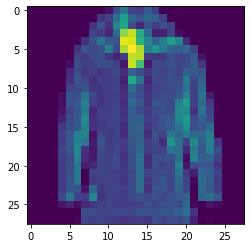

In [94]:
#object/class 4-Coat
plt.imshow(Xtrain[np.argmax(ytrain==4)])
#Class 2 misclasaified with Class 4

#### Current model generates training accuracy of ~95% accuracy while an accuracy of ~91% on validation set while an average precision, recall and f1-score of ~90% on test data.

#### Model has overall good ability and reliability to identify and discern objects but remains prone to misclassification and gets confused between similar objects, especially class 6. 


#### High-level features in these classes show high visual similarity as appears in the images and are hard to distinguish for the model. One can dabble between kernel size and number of filters and/or convolutional layers to improve feature selection/extraction. This may also lead to fine tuning the model further and raise the accuracy levels, while keeping in mind that it may be prone to overfitting.